In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('request_log.csv')
df.head(10)

,URL,Start Time,End Time,RTT (seconds),Status Code
0,https://www.detik.com/?tagfrom=framebar,2024-08-30 12:55:24.364923,2024-08-30 12:55:24.588672,0.223749,200.0
1,https://www.detik.com/?tagfrom=framebar,2024-08-30 12:55:24.399622,2024-08-30 12:55:24.639931,0.240309,200.0
2,https://finance.detik.com,2024-08-30 12:55:24.384409,2024-08-30 12:55:24.647533,0.263124,200.0
3,https://sport.detik.com/,2024-08-30 12:55:24.399622,2024-08-30 12:55:24.647533,0.247911,200.0
4,https://news.detik.com/,2024-08-30 12:55:24.405387,2024-08-30 12:55:24.656356,0.250969,200.0
5,https://hot.detik.com/,2024-08-30 12:55:24.426302,2024-08-30 12:55:24.672052,0.245750,200.0
6,https://www.detik.com/?tagfrom=framebar,2024-08-30 12:55:24.440510,2024-08-30 12:55:24.687592,0.247082,200.0
7,https://hot.detik.com,2024-08-30 12:55:24.448355,2024-08-30 12:55:24.703259,0.254904,200.0
8,https://www.detik.com/disclaimer,2024-08-30 12:55:24.367340,2024-08-30 12:55:24.722928,0.355588,200.0
9,https://www.detik.com/?tagfrom=framebar,2024-08-30 12:55:24.581528,2024-08-30 12:55:24.724004,0.142476,200.0


In [16]:
df.tail(10)

,URL,Start Time,End Time,RTT (seconds),Status Code
984,https://news.detik.com/pemilu/,2024-08-30 12:55:24.519823,2024-08-30 12:55:29.826139,5.306316,200.0
985,https://news.detik.com/pilkada/d-7515654/final...,2024-08-30 12:55:24.523606,2024-08-30 12:55:29.826139,5.302533,200.0
986,https://www.detik.com/jatim/pilkada/d-7515771/...,2024-08-30 12:55:24.537263,2024-08-30 12:55:29.859779,5.322516,200.0
987,https://news.detik.com/pilkada/d-7515661/jubir...,2024-08-30 12:55:25.614611,2024-08-30 12:55:29.875844,4.261233,200.0
988,https://adsmart.detik.com,2024-08-30 12:55:24.744083,2024-08-30 12:55:29.972151,5.228068,200.0
989,https://finance.detik.com/berita-ekonomi-bisni...,2024-08-30 12:55:24.528132,2024-08-30 12:55:30.064338,5.536206,200.0
990,https://news.detik.com/pemilu/,2024-08-30 12:55:24.511485,2024-08-30 12:55:30.089492,5.578007,200.0
991,https://www.detik.com/?tagfrom=framebar,2024-08-30 12:55:25.631668,2024-08-30 12:55:30.165205,4.533537,200.0
992,https://www.detik.com/sumut/pilkada/d-7515677/...,2024-08-30 12:55:24.511485,2024-08-30 12:55:30.205956,5.694471,200.0
993,https://inet.detik.com/telecommunication/d-751...,2024-08-30 12:55:25.592764,2024-08-30 12:55:30.538125,4.945361,200.0


In [9]:
url_counts = df['URL'].value_counts()
print(url_counts.to_string())

URL
https://news.detik.com/pilkada/d-7515661/jubir-pastikan-hubungan-anies-dan-pdip-bagus-meski-tak-maju-pilgub-jabar                 177
https://event.detik.com/507/ultima-sonora-the-river-of-life-pre-competition-concert?utm_source=detikcom&utm_medium=channel_box    110
https://finance.detik.com/berita-ekonomi-bisnis/d-7515529/menhub-buka-suara-soal-subsidi-krl-berbasis-nik-lagi-dibahas             83
https://news.detik.com/pemilu/                                                                                                     74
https://www.detik.com/?tagfrom=framebar                                                                                            48
https://20.detik.com/detikupdate/20240829-240829149/jubir-ungkap-alasan-anies-tak-maju-di-pilgub-jabar                             39
https://news.detik.com/pilkada/d-7515776/kpu-nyatakan-berkas-dharma-kun-lengkap-total-3-paslon-maju-pilgub-jakarta                 38
https://www.detik.com/pop/                                

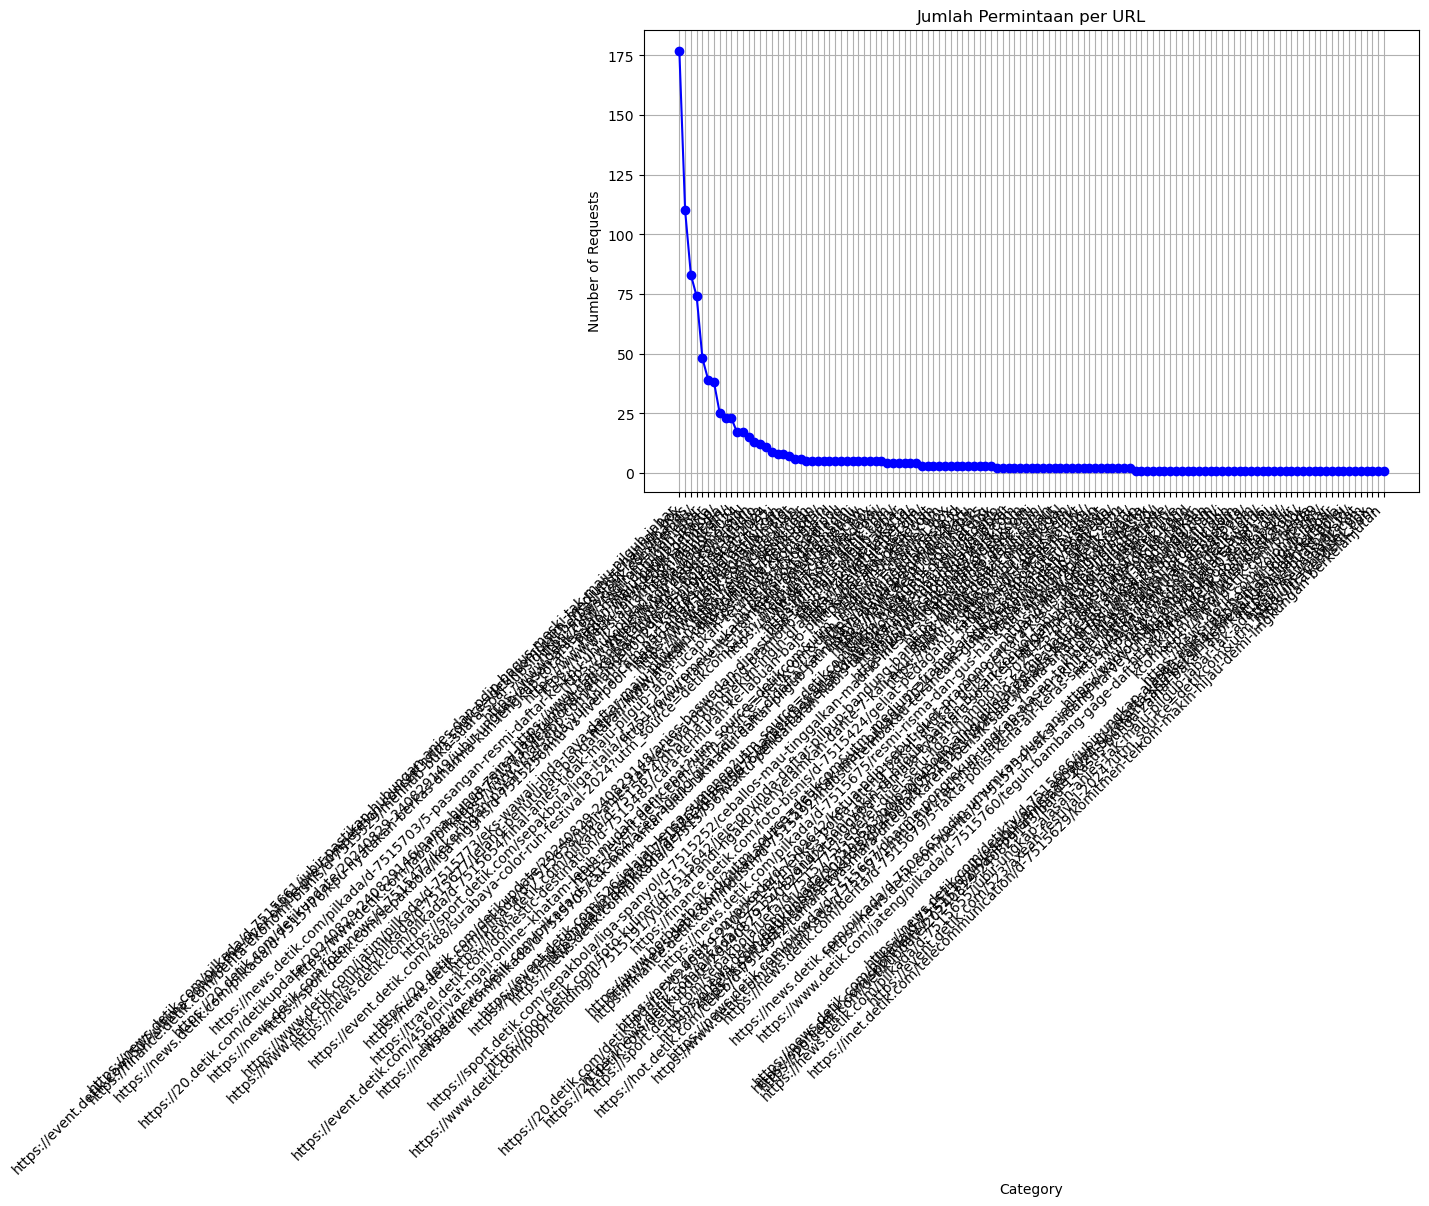

In [10]:
import matplotlib.pyplot as plt

temp_df = pd.DataFrame({'url': url_counts.index, 'Requests': url_counts.values})

plt.figure(figsize=(10, 6))
plt.plot(temp_df['url'], temp_df['Requests'], marker='o', linestyle='-', color='blue')
plt.title('Jumlah Permintaan per URL')
plt.xlabel('Category')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right')  
plt.grid(True)  
plt.show()

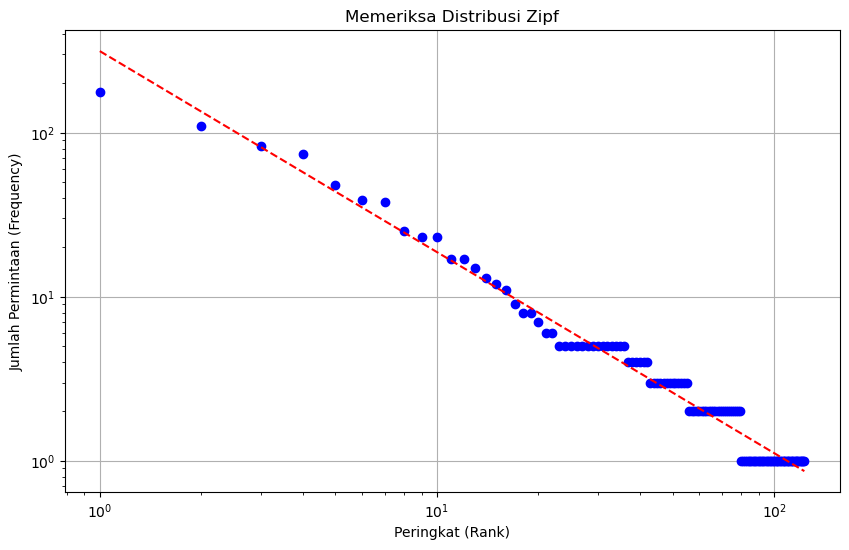

Koefisien Eksponen Zipf (Slope): -1.2251065516523374
R-squared: 0.9777572665115897


In [12]:
from scipy.stats import linregress
import numpy as np

category_counts = df['URL'].value_counts()

sorted_counts = category_counts.sort_values(ascending=False)

ranks = np.arange(1, len(sorted_counts) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_counts.values, marker='o', linestyle='none', color='blue')
plt.title("Memeriksa Distribusi Zipf")
plt.xlabel("Peringkat (Rank)")
plt.ylabel("Jumlah Permintaan (Frequency)")
plt.grid(True)

slope, intercept, r_value, p_value, std_err = linregress(np.log(ranks), np.log(sorted_counts.values))

plt.plot(ranks, np.exp(intercept) * ranks**slope, color="red", linestyle='--')
plt.show()

print(f"Koefisien Eksponen Zipf (Slope): {slope}")
print(f"R-squared: {r_value**2}")